# __unMazer Assignment- Data Analysis Austin Airbnb__ #

In [2]:
import numpy as np

In [200]:
import pandas as pd
import seaborn as sns
import geojsonio as gj
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
import geopandas as gpd
from shapely.geometry import Point, MultiPolygon

In [202]:
df=pd.read_csv('listings.csv')

### PART (A)- TOP AREAS WITH HIGHEST NUMBER OF LISTING ###

Text(0.5, 1.0, 'Neighbourhood Zipcode Distribution')

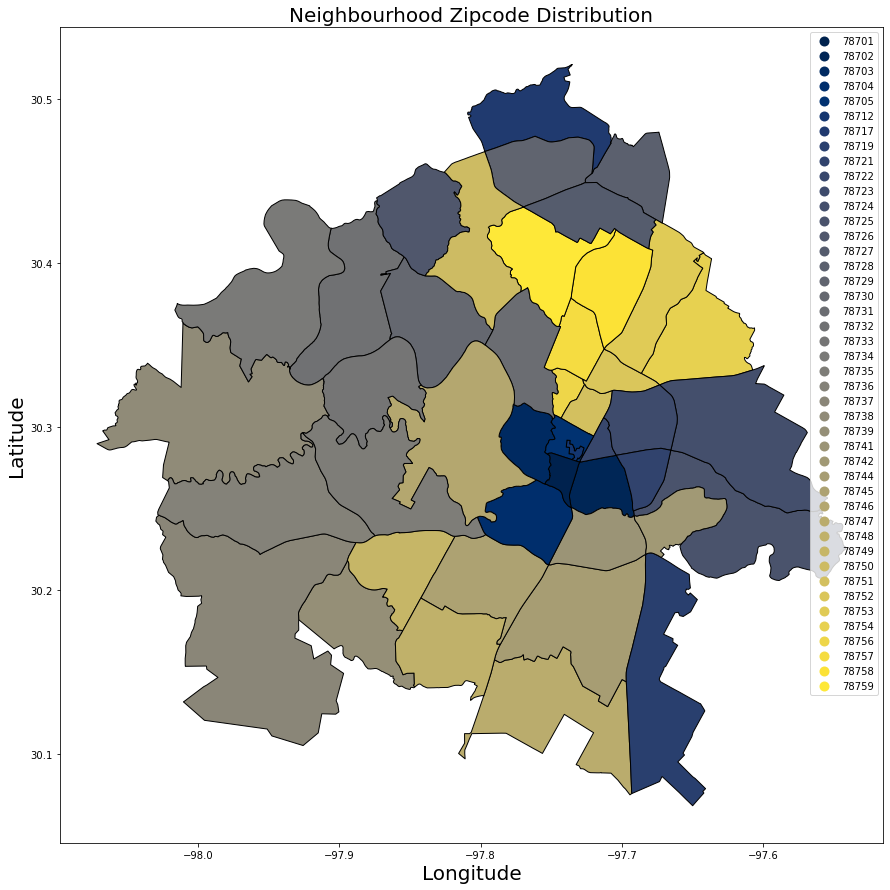

In [265]:
neighb = gpd.read_file('neighbourhoods.geojson')
neighb.plot(cmap='cividis',column='neighbourhood',edgecolor='black',figsize=(15,15),legend=True)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Neighbourhood Zipcode Distribution',size=20)


In [266]:
neighb['neighbourhood']=neighb['neighbourhood'].astype(int)

*__'Aggregate' column is used to determine total number of listings in respective neighbourhood.__*

In [267]:
c = pd.DataFrame(df.neighbourhood.value_counts().reset_index().values, columns=["neighbourhood", "Aggregate"])
cfinal = c.sort_index(axis = 0, ascending=True)

columns_titles = ["Aggregate","neighbourhood"]
cfinal=cfinal.reindex(columns=columns_titles)


In [268]:
neighb=pd.merge(neighb,cfinal, on='neighbourhood')


,neighbourhood,neighbourhood_group,geometry,Aggregate
29,78704,None,"MULTIPOLYGON (((-97.75447 30.26507, -97.75410 ...",1822
14,78702,None,"MULTIPOLYGON (((-97.69186 30.24848, -97.69172 ...",1263
43,78701,None,"MULTIPOLYGON (((-97.73599 30.25101, -97.73589 ...",713
15,78741,None,"MULTIPOLYGON (((-97.70652 30.25024, -97.70628 ...",622
19,78703,None,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",530
23,78745,None,"MULTIPOLYGON (((-97.79207 30.23183, -97.78922 ...",513
31,78705,None,"MULTIPOLYGON (((-97.72978 30.29871, -97.72893 ...",505
6,78751,None,"MULTIPOLYGON (((-97.70677 30.32211, -97.70693 ...",478
37,78723,None,"MULTIPOLYGON (((-97.66540 30.28564, -97.66595 ...",313
32,78758,None,"MULTIPOLYGON (((-97.71223 30.34801, -97.71246 ...",298


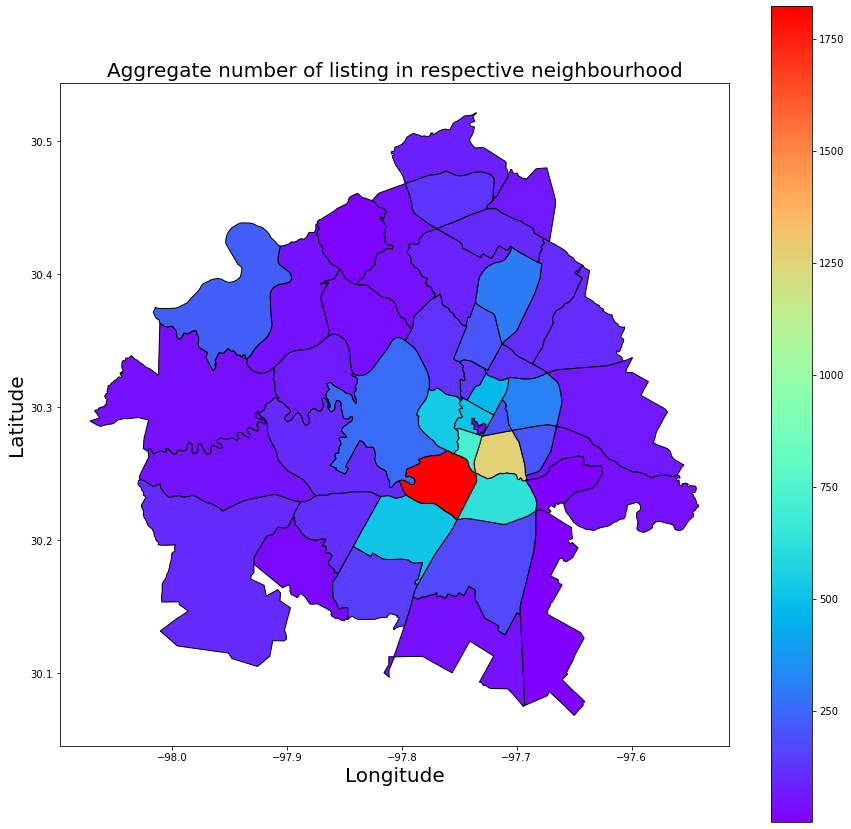

In [274]:
from matplotlib.legend import Legend
neighb.plot(cmap='rainbow',figsize=(15,15),edgecolor='black',column=neighb['Aggregate'],legend=True)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Aggregate number of listing in respective neighbourhood',size=20)
neighb.sort_values(by=['Aggregate'],ascending=False).head(10)

### PART B- SCATTER MAP OF NEIGHBOURHOOD CATEGORIZED BY ENTIRE HOME AND PRIVATE ROOM ###

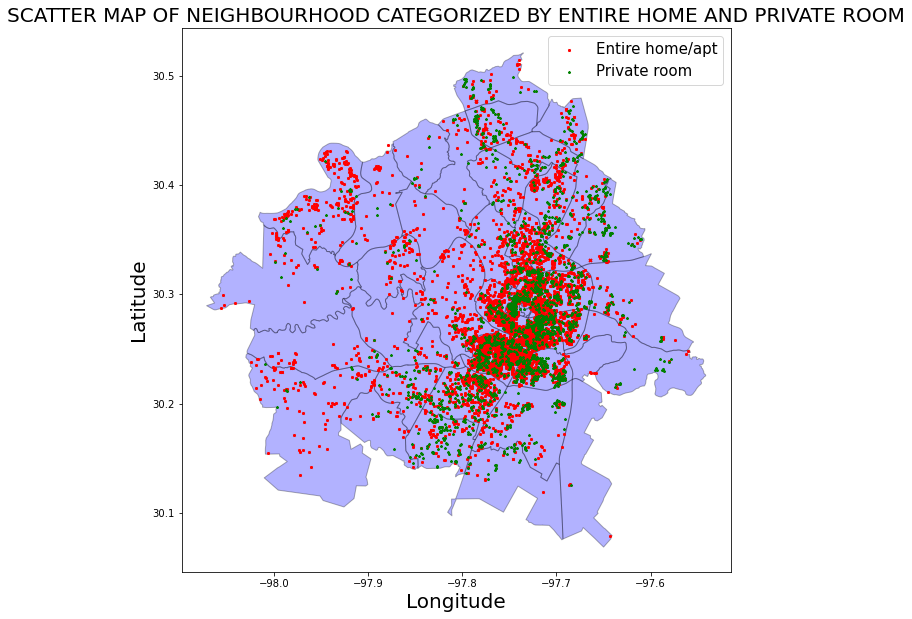

In [277]:
neighb2=neighb
points = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
room_df = gpd.GeoDataFrame(df,crs='EPSG:4326',geometry=points)
fig,ax = plt.subplots(figsize=(10,10))
neighb2.plot(ax=ax,alpha=0.3,edgecolor='black',color='blue')
room_df[room_df['room_type'] == 'Entire home/apt'].plot(ax=ax,markersize=5,color='red',marker='x',label='Entire home/apt')
room_df[room_df['room_type'] == 'Private room'].plot(ax=ax,markersize=5,color='green',marker='*',label='Private room')
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('SCATTER MAP OF NEIGHBOURHOOD CATEGORIZED BY ENTIRE HOME AND PRIVATE ROOM',size=20)
plt.legend(prop={'size':15})

### PART B(i)- THEMATIC MAP OF NEIGHBOURHOOD BROKEN DOWN BY ENTIRE HOME ###

In [278]:
new_df1=df[df['room_type']=='Entire home/apt']
new_df1.neighbourhood.value_counts
neighb3= gpd.read_file('neighbourhoods.geojson')
neighb3['neighbourhood']=neighb3['neighbourhood'].astype(int)

In [279]:
d = pd.DataFrame(new_df1.neighbourhood.value_counts().reset_index().values, columns=["neighbourhood", "Aggregate"])
dfinal = d.sort_index(axis = 0, ascending=True)

columns_titles = ["Aggregate","neighbourhood"]
dfinal=dfinal.reindex(columns=columns_titles)
neighb3=pd.merge(neighb3,dfinal, on='neighbourhood')


Text(0.5, 1.0, 'Aggregate number of Entire rooms in respective neighbourhood')

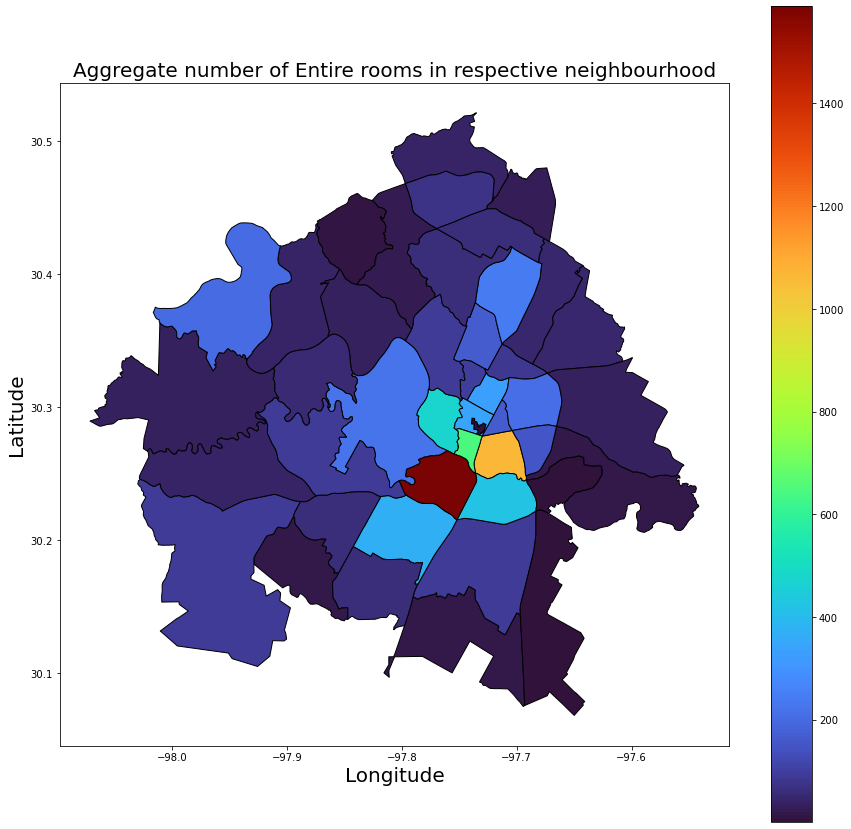

In [280]:
neighb3.plot(cmap='turbo',figsize=(15,15),edgecolor='black',column=states3['Aggregate'],legend=True)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Aggregate number of Entire rooms in respective neighbourhood',size=20)


### PART B(ii)- THEMATIC MAP OF NEIGHBOURHOOD BROKEN DOWN BY SINGLE HOME ###

In [281]:
new_df2=df[df['room_type']=='Private room']
new_df2.neighbourhood.value_counts
neighb4= gpd.read_file('neighbourhoods.geojson')
neighb4['neighbourhood']=neighb4['neighbourhood'].astype(int)

In [282]:
d2 = pd.DataFrame(new_df2.neighbourhood.value_counts().reset_index().values, columns=["neighbourhood", "Aggregate"])
d2final = d2.sort_index(axis = 0, ascending=True)

columns_titles = ["Aggregate","neighbourhood"]
d2final=d2final.reindex(columns=columns_titles)
neighb4=pd.merge(neighb4,d2final, on='neighbourhood')

neighb5=gpd.read_file('neighbourhoods.geojson')
neighb5['neighbourhood']=neighb5['neighbourhood'].astype(int)

In [283]:
neighb4=neighb4[['neighbourhood','Aggregate']]


In [284]:
merged = pd.merge(left=neighb5, right=neighb4, how='left', left_on='neighbourhood', right_on='neighbourhood')


In [285]:
merged['Aggregate'] = merged['Aggregate'].fillna(0)

Text(0.5, 1.0, 'Aggregate number of Private rooms in respective neighbourhood')

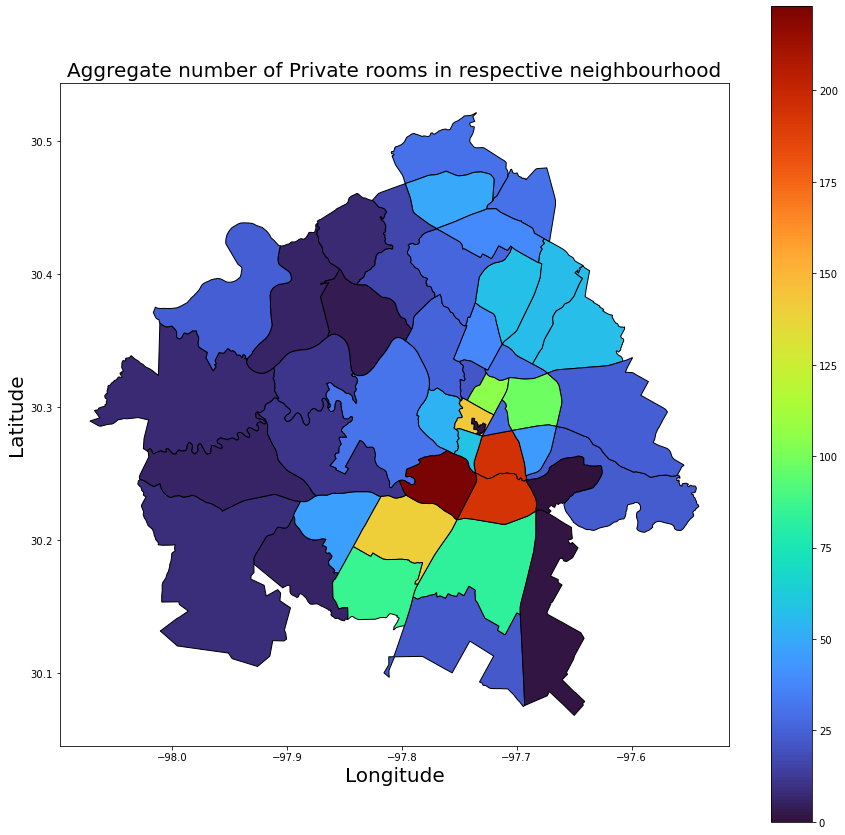

In [286]:
merged.plot(cmap='turbo',figsize=(15,15),edgecolor='black',column=merged['Aggregate'],legend=True)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Aggregate number of Private rooms in respective neighbourhood',size=20)

### PART (C)- Top 10 hosts by Total Number of listings ###

In [289]:
host = pd.DataFrame(df.host_id.value_counts().reset_index().values, columns=["host_id", "Aggregate"])
host_final = host.sort_index(axis = 0, ascending=True)
host_final=host_final.head(10)
df2=df[['host_id','host_name']]
host_final=pd.merge(left=host_final, right=df2, how='left', left_on='host_id', right_on='host_id')

In [290]:
host_final=host_final.drop_duplicates()

In [291]:
host_final=host_final.reset_index(drop=True)
host_final

,host_id,Aggregate,host_name
0,359036978,358,Kia
1,104309976,131,WanderJaunt
2,109638288,82,TurnKey Vacation Rentals
3,8167447,81,Martin
4,118565935,56,Renters Club
5,346827202,48,Madalynn
6,194953121,45,Christian
7,210733801,43,Above
8,368944610,40,Kia
9,15782486,38,Lodgewell


## PART(D)-Thematic map of average price or respective Neighbourhood ##

In [292]:
df_price=df[['neighbourhood','price']]
df_price_mean=df_price.groupby('neighbourhood').mean()

In [293]:
neighb6=gpd.read_file('neighbourhoods.geojson')
neighb6['neighbourhood']=neighb6['neighbourhood'].astype(int)

In [294]:
merged_price_mean = pd.merge(left=neighb6, right=df_price_mean, how='left', left_on='neighbourhood', right_on='neighbourhood')


,neighbourhood,neighbourhood_group,geometry,price
22,78730,None,"MULTIPOLYGON (((-97.84397 30.39357, -97.84183 ...",1061.837838
36,78733,None,"MULTIPOLYGON (((-97.84295 30.32310, -97.84274 ...",1051.074627
2,78732,None,"MULTIPOLYGON (((-97.87303 30.43806, -97.87335 ...",780.702128
33,78746,None,"MULTIPOLYGON (((-97.77663 30.32301, -97.77648 ...",648.019531
3,78737,None,"MULTIPOLYGON (((-98.01876 30.24167, -98.01617 ...",474.237113
8,78738,None,"MULTIPOLYGON (((-98.00622 30.36079, -98.00424 ...",435.795455
19,78703,None,"MULTIPOLYGON (((-97.76606 30.31295, -97.76482 ...",413.058491
0,78739,None,"MULTIPOLYGON (((-97.89002 30.20941, -97.88929 ...",398.320000
38,78750,None,"MULTIPOLYGON (((-97.79105 30.45049, -97.79087 ...",392.829268
42,78734,None,"MULTIPOLYGON (((-97.92086 30.43496, -97.92067 ...",358.158590


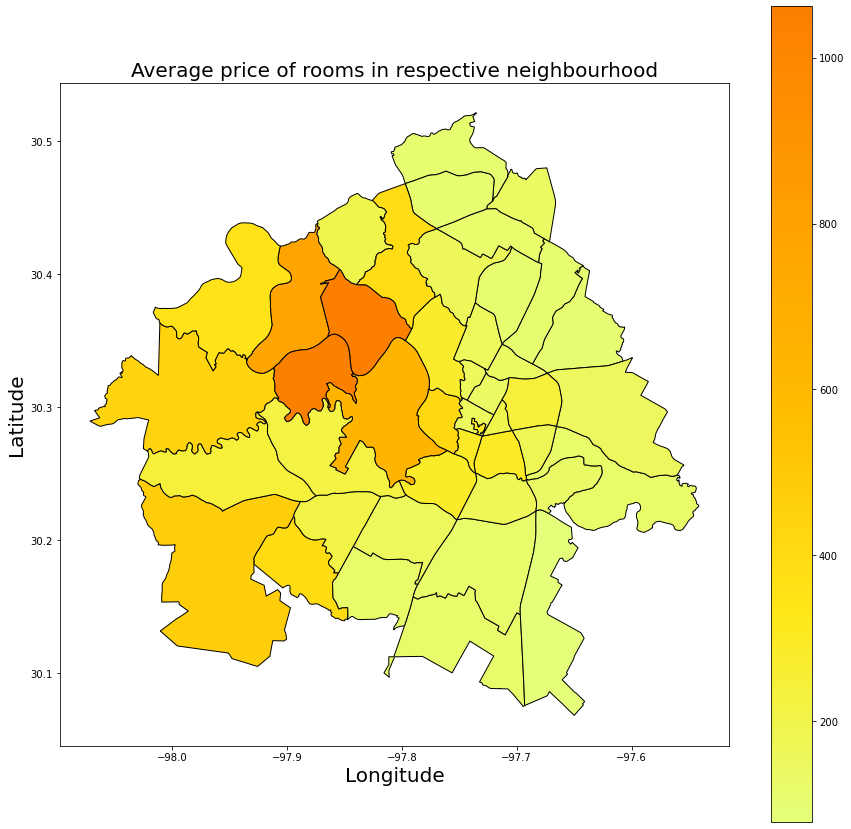

In [296]:
merged_price_mean.plot(cmap='Wistia',figsize=(15,15),edgecolor='black',column=merged_price_mean['price'],legend=True)
plt.xlabel('Longitude',size=20)
plt.ylabel('Latitude',size=20)
plt.title('Average price of rooms in respective neighbourhood',size=20)
merged_price_mean.sort_values(by=['price'],ascending=False).head(10)